 # San Francisco Crime Analysis

## Problem Statement

We aim to classify the type of crimes committed within San Francisco,<br> 
given the time and location of a criminal occurrence. This study is important and beneficial.<br>
Using data mining approaches, we can predict the location, type and time of criminal occurrences in the city.<br>

## Data Definition

Dates - timestamp of the crime incident<br>
Category - category of the crime incident (only in train.csv). This is the target variable you are going to predict.<br>
Descript - detailed description of the crime incident (only in train.csv)<br>
DayOfWeek - the day of the week<br>
PdDistrict - name of the Police Department District<br>
Resolution - how the crime incident was resolved (only in train.csv)<br>
Address - the approximate street address of the crime incident<br>
X - Longitude<br>
Y - Latitude<br>

# Importing Libraries

In [1]:
import pandas as pd                                 
import numpy as np
import matplotlib.pyplot as plt                       
%matplotlib inline
import seaborn as sns                              
from datetime import datetime
import calendar
from sklearn.preprocessing import LabelEncoder      
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
import warnings
warnings.filterwarnings('ignore')

# Load data

In [2]:
data = pd.read_csv(r"C:\Users\DELL\Desktop\crime.csv")

In [3]:
data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


# Data Exploration & Analysis Extension

In [4]:
# Checking the duplicate values.
data.duplicated().sum()

0

In [5]:
# shape of data
data.shape

(150500, 13)

In [6]:
# checking data columns names
data.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],
      dtype='object')

In [7]:
# Count number of observations for each crime 
data['Category'].value_counts()

LARCENY/THEFT                  40409
OTHER OFFENSES                 19599
NON-CRIMINAL                   17866
ASSAULT                        13577
VANDALISM                       8589
VEHICLE THEFT                   6419
WARRANTS                        5914
BURGLARY                        5802
SUSPICIOUS OCC                  5782
MISSING PERSON                  4338
DRUG/NARCOTIC                   4243
ROBBERY                         3299
FRAUD                           2635
SECONDARY CODES                 1841
TRESPASS                        1812
WEAPON LAWS                     1658
SEX OFFENSES, FORCIBLE           940
STOLEN PROPERTY                  882
RECOVERED VEHICLE                736
DISORDERLY CONDUCT               658
PROSTITUTION                     641
FORGERY/COUNTERFEITING           619
DRUNKENNESS                      465
DRIVING UNDER THE INFLUENCE      378
ARSON                            286
KIDNAPPING                       257
EMBEZZLEMENT                     168
L

In [8]:
# Count number of observations of crime for each PD District
data['PdDistrict'].value_counts()

SOUTHERN      28445
NORTHERN      20100
MISSION       19503
CENTRAL       17666
BAYVIEW       14303
INGLESIDE     11594
TARAVAL       11325
TENDERLOIN     9942
RICHMOND       8922
PARK           8699
Name: PdDistrict, dtype: int64

In [9]:
# Count number of observations for each day of week
data['DayOfWeek'].value_counts()

Friday       23371
Saturday     22172
Thursday     21395
Wednesday    21332
Tuesday      21242
Monday       20783
Sunday       20205
Name: DayOfWeek, dtype: int64

In [10]:
# Count number of observations for Resolution feature
data['Resolution'].value_counts()

NONE                                      107780
ARREST, BOOKED                             39416
UNFOUNDED                                   1608
JUVENILE BOOKED                             1056
EXCEPTIONAL CLEARANCE                        371
ARREST, CITED                                144
CLEARED-CONTACT JUVENILE FOR MORE INFO        58
NOT PROSECUTED                                22
LOCATED                                       20
PSYCHOPATHIC CASE                             17
JUVENILE CITED                                 3
JUVENILE DIVERTED                              2
COMPLAINANT REFUSES TO PROSECUTE               2
PROSECUTED BY OUTSIDE AGENCY                   1
Name: Resolution, dtype: int64

## Statistical Summary

In [11]:
data.describe()

,IncidntNum,X,Y,PdId
count,1.505000e+05,150500.000000,150500.000000,1.505000e+05
mean,1.616440e+08,-122.423599,37.768921,1.616440e+13
std,5.535976e+06,0.026210,0.023637,5.535976e+11
min,1.135121e+07,-122.513642,37.707922,1.135121e+12
25%,1.603283e+08,-122.434036,37.756486,1.603283e+13
50%,1.606541e+08,-122.416903,37.775421,1.606541e+13
75%,1.609764e+08,-122.406605,37.785063,1.609764e+13
max,9.910090e+08,-122.365565,37.819975,9.910090e+13


In [12]:
data.describe(include='object')

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,Location
count,150500,150500,150500,150500,150500,150499,150500,150500,150500
unique,39,726,7,366,1439,10,14,16130,19386
top,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,01/01/2016 12:00:00 AM,12:00,SOUTHERN,NONE,800 Block of BRYANT ST,"(37.775420706711, -122.403404791479)"
freq,40409,17741,23371,558,3842,28445,107780,3561,3536


## Data Preprocessing

In [13]:
# changing date into date time format
data["Date"] = pd.to_datetime(data['Date'])

In [14]:
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

In [15]:
data['Month'] = data["Month"].astype("int64")

In [16]:
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x])

### Checking the null values

In [17]:
data.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    1
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
Day           0
Month         0
Year          0
dtype: int64

#### Filling the missing value in PdDistrict using the mode values

In [18]:
data['PdDistrict'] = data['PdDistrict'].fillna(data['PdDistrict'].mode()[0])

In [19]:
data.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
Day           0
Month         0
Year          0
dtype: int64

### Checking the datatypes

In [20]:
data.dtypes

IncidntNum             int64
Category              object
Descript              object
DayOfWeek             object
Date          datetime64[ns]
Time                  object
PdDistrict            object
Resolution            object
Address               object
X                    float64
Y                    float64
Location              object
PdId                   int64
Day                    int64
Month                 object
Year                   int64
dtype: object

# Data Vizualization

In [21]:
data.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId',
       'Day', 'Month', 'Year'],
      dtype='object')

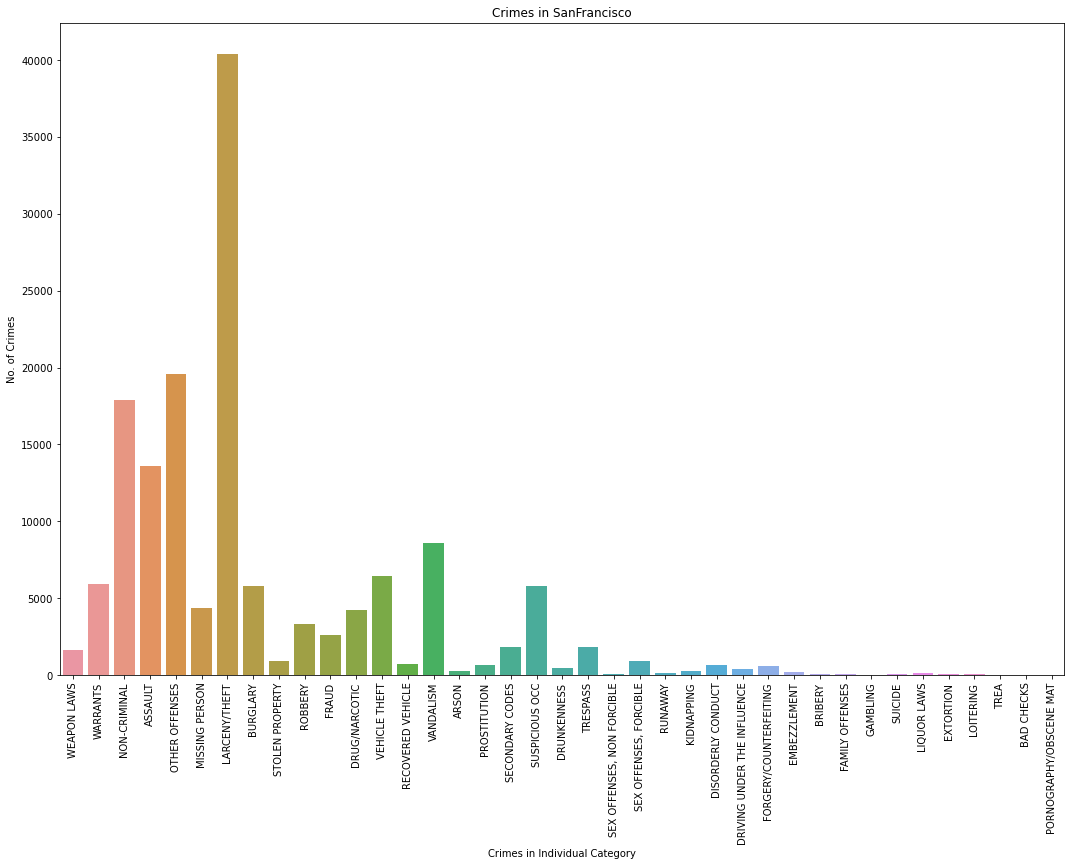

In [22]:
plt.figure(figsize=(18,12))
sns.countplot(data['Category'])
plt.xticks(rotation=90);
plt.ylabel('No. of Crimes')
plt.xlabel('Crimes in Individual Category')
plt.title('Crimes in SanFrancisco');

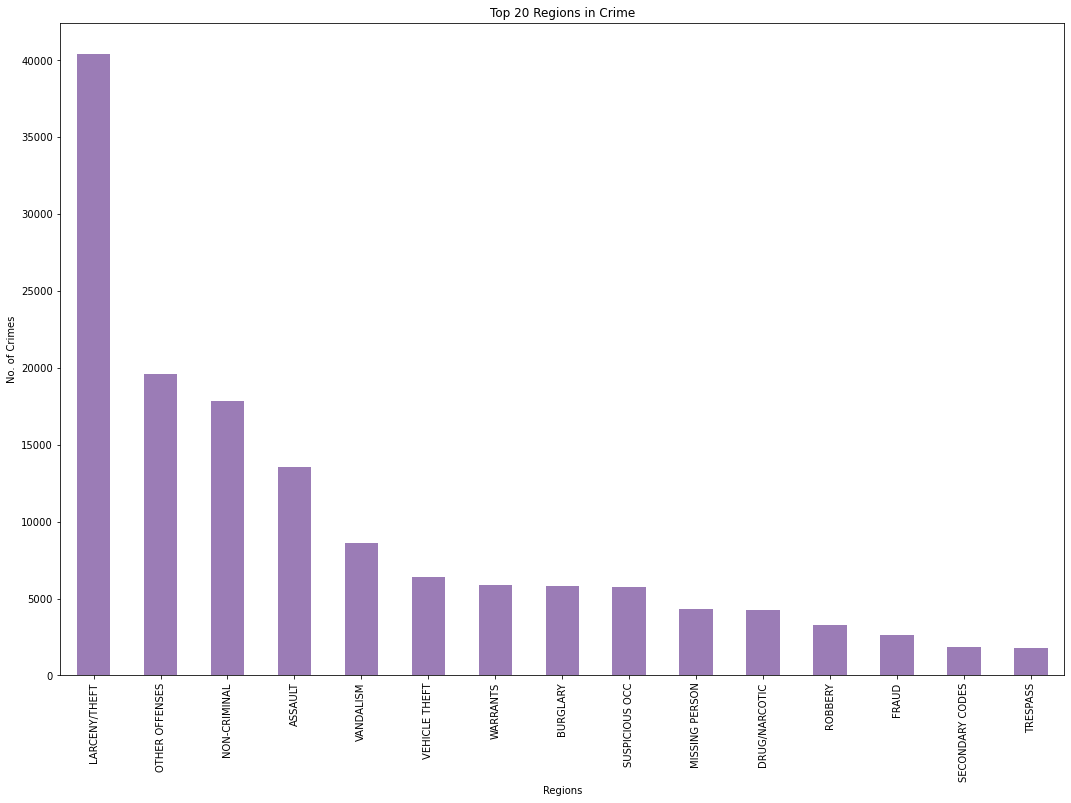

In [23]:
top20Crimes = data['Category'].value_counts().head(15)
plt.figure(figsize=(18,12))
top20Crimes.plot.bar(color='#9b7cb6')
plt.xlabel('Regions')
plt.ylabel('No. of Crimes')
plt.title('Top 20 Regions in Crime');

Clearly, we can see that Larceny/Theft is the most occurred type of crime in the all the years.<br>


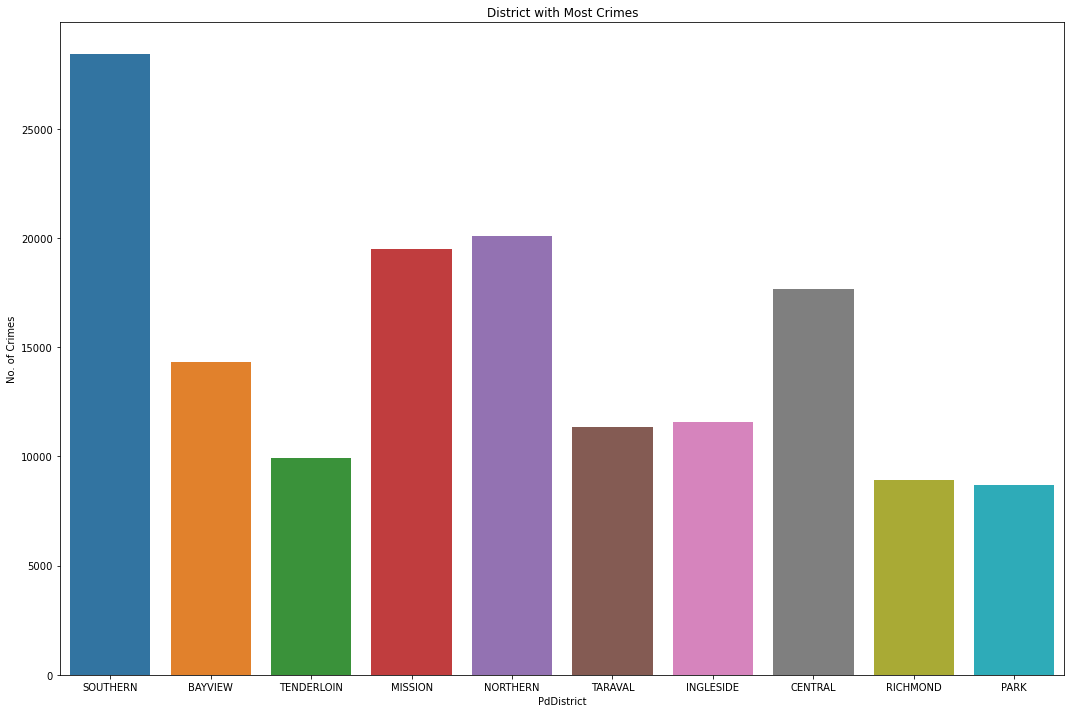

In [24]:
plt.figure(figsize=(18,12))
sns.countplot(data['PdDistrict'])
plt.title('District with Most Crimes')
plt.ylabel('No. of Crimes');

Southern is the bay district where most of the crimes got reported.<br>

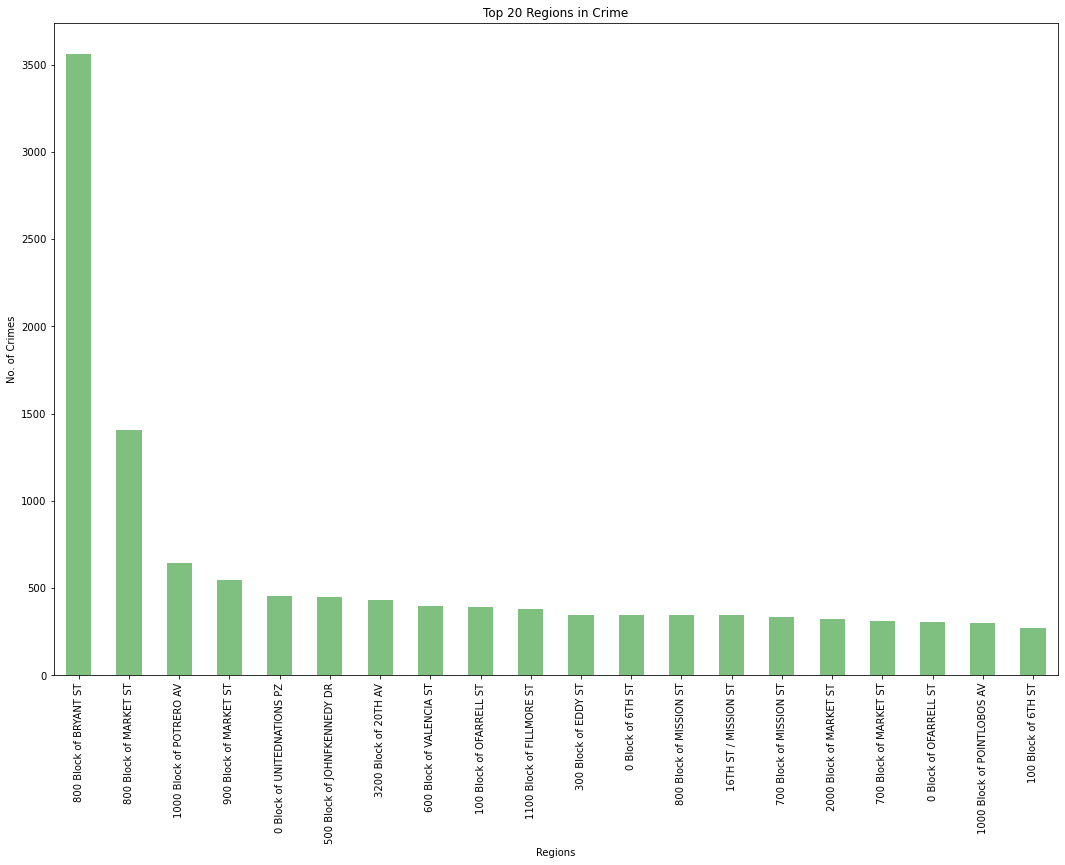

In [25]:
top20Regions = data['Address'].value_counts().head(20)
plt.figure(figsize=(18,12))
top20Regions.plot.bar(color='green', alpha=0.5)
plt.xlabel('Regions')
plt.ylabel('No. of Crimes')
plt.title('Top 20 Regions in Crime');

800 Block of BRTANT ST is the location where most of the crimes got reported.<br>

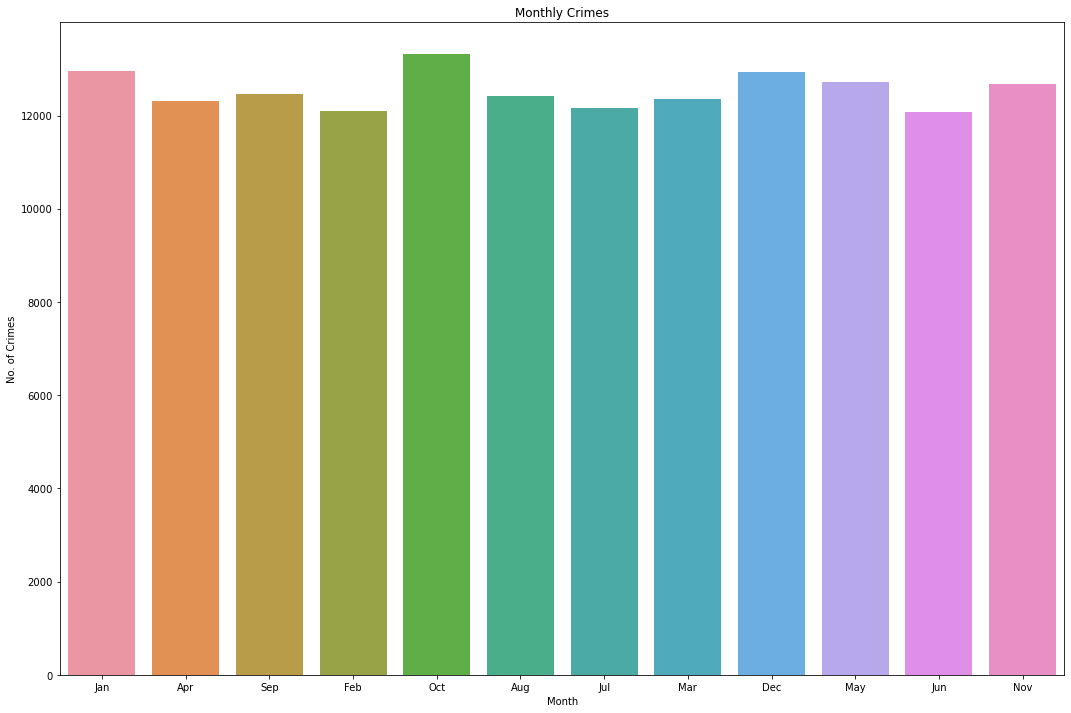

In [26]:
plt.figure(figsize=(18,12))
sns.countplot(data['Month'])
plt.title('Monthly Crimes')
plt.ylabel('No. of Crimes');

October is the month when the most crimes reported.<br>

In [27]:
day_count=data['DayOfWeek'].value_counts()
day_count

Friday       23371
Saturday     22172
Thursday     21395
Wednesday    21332
Tuesday      21242
Monday       20783
Sunday       20205
Name: DayOfWeek, dtype: int64

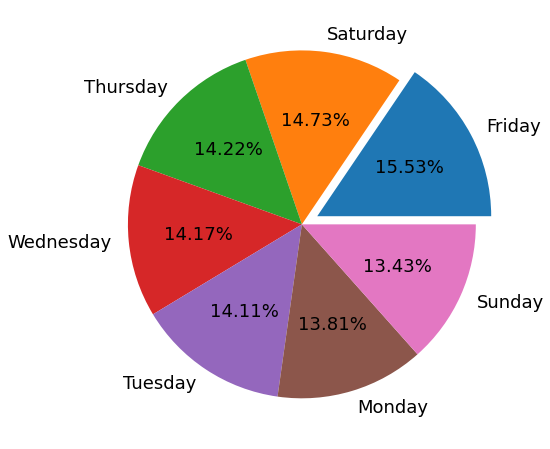

In [28]:
plt.figure(figsize=(12,8))
explode = [0.1,0,0,0,0,0,0]
plt.pie(day_count[:7],explode=explode,labels = data['DayOfWeek'].value_counts().keys()[:7],autopct="%.2f%%"
        ,textprops={'fontsize':18});

Friday is the day where most of the crimes occurred.<br>
Sunday is the day where less crimes (compared with other days) occurred.<br>
This is more likely because it is a holiday.<br>

In [29]:
data["Category"].value_counts().head(10)

LARCENY/THEFT     40409
OTHER OFFENSES    19599
NON-CRIMINAL      17866
ASSAULT           13577
VANDALISM          8589
VEHICLE THEFT      6419
WARRANTS           5914
BURGLARY           5802
SUSPICIOUS OCC     5782
MISSING PERSON     4338
Name: Category, dtype: int64

In [30]:
# grouping of data on the basis of category
larceny = data[data.Category.str.contains("LARCENY/THEFT")]
Other_Offences = data[data.Category.str.contains("OTHER OFFENSES")]
Non_Criminal = data[data.Category.str.contains("NON-CRIMINAL")]
Assault = data[data.Category.str.contains("ASSAULT")]
Vandalism = data[data.Category.str.contains("VANDALISM")]
Vehicle_theft = data[data.Category.str.contains("VEHICLE THEFT")]
Warrants = data[data.Category.str.contains("WARRANTS")]
Burglary = data[data.Category.str.contains("BURGLARY")]
Suspicious_Occ = data[data.Category.str.contains("SUSPICIOUS OCC")]
Missing_Person = data[data.Category.str.contains("MISSING PERSON")]

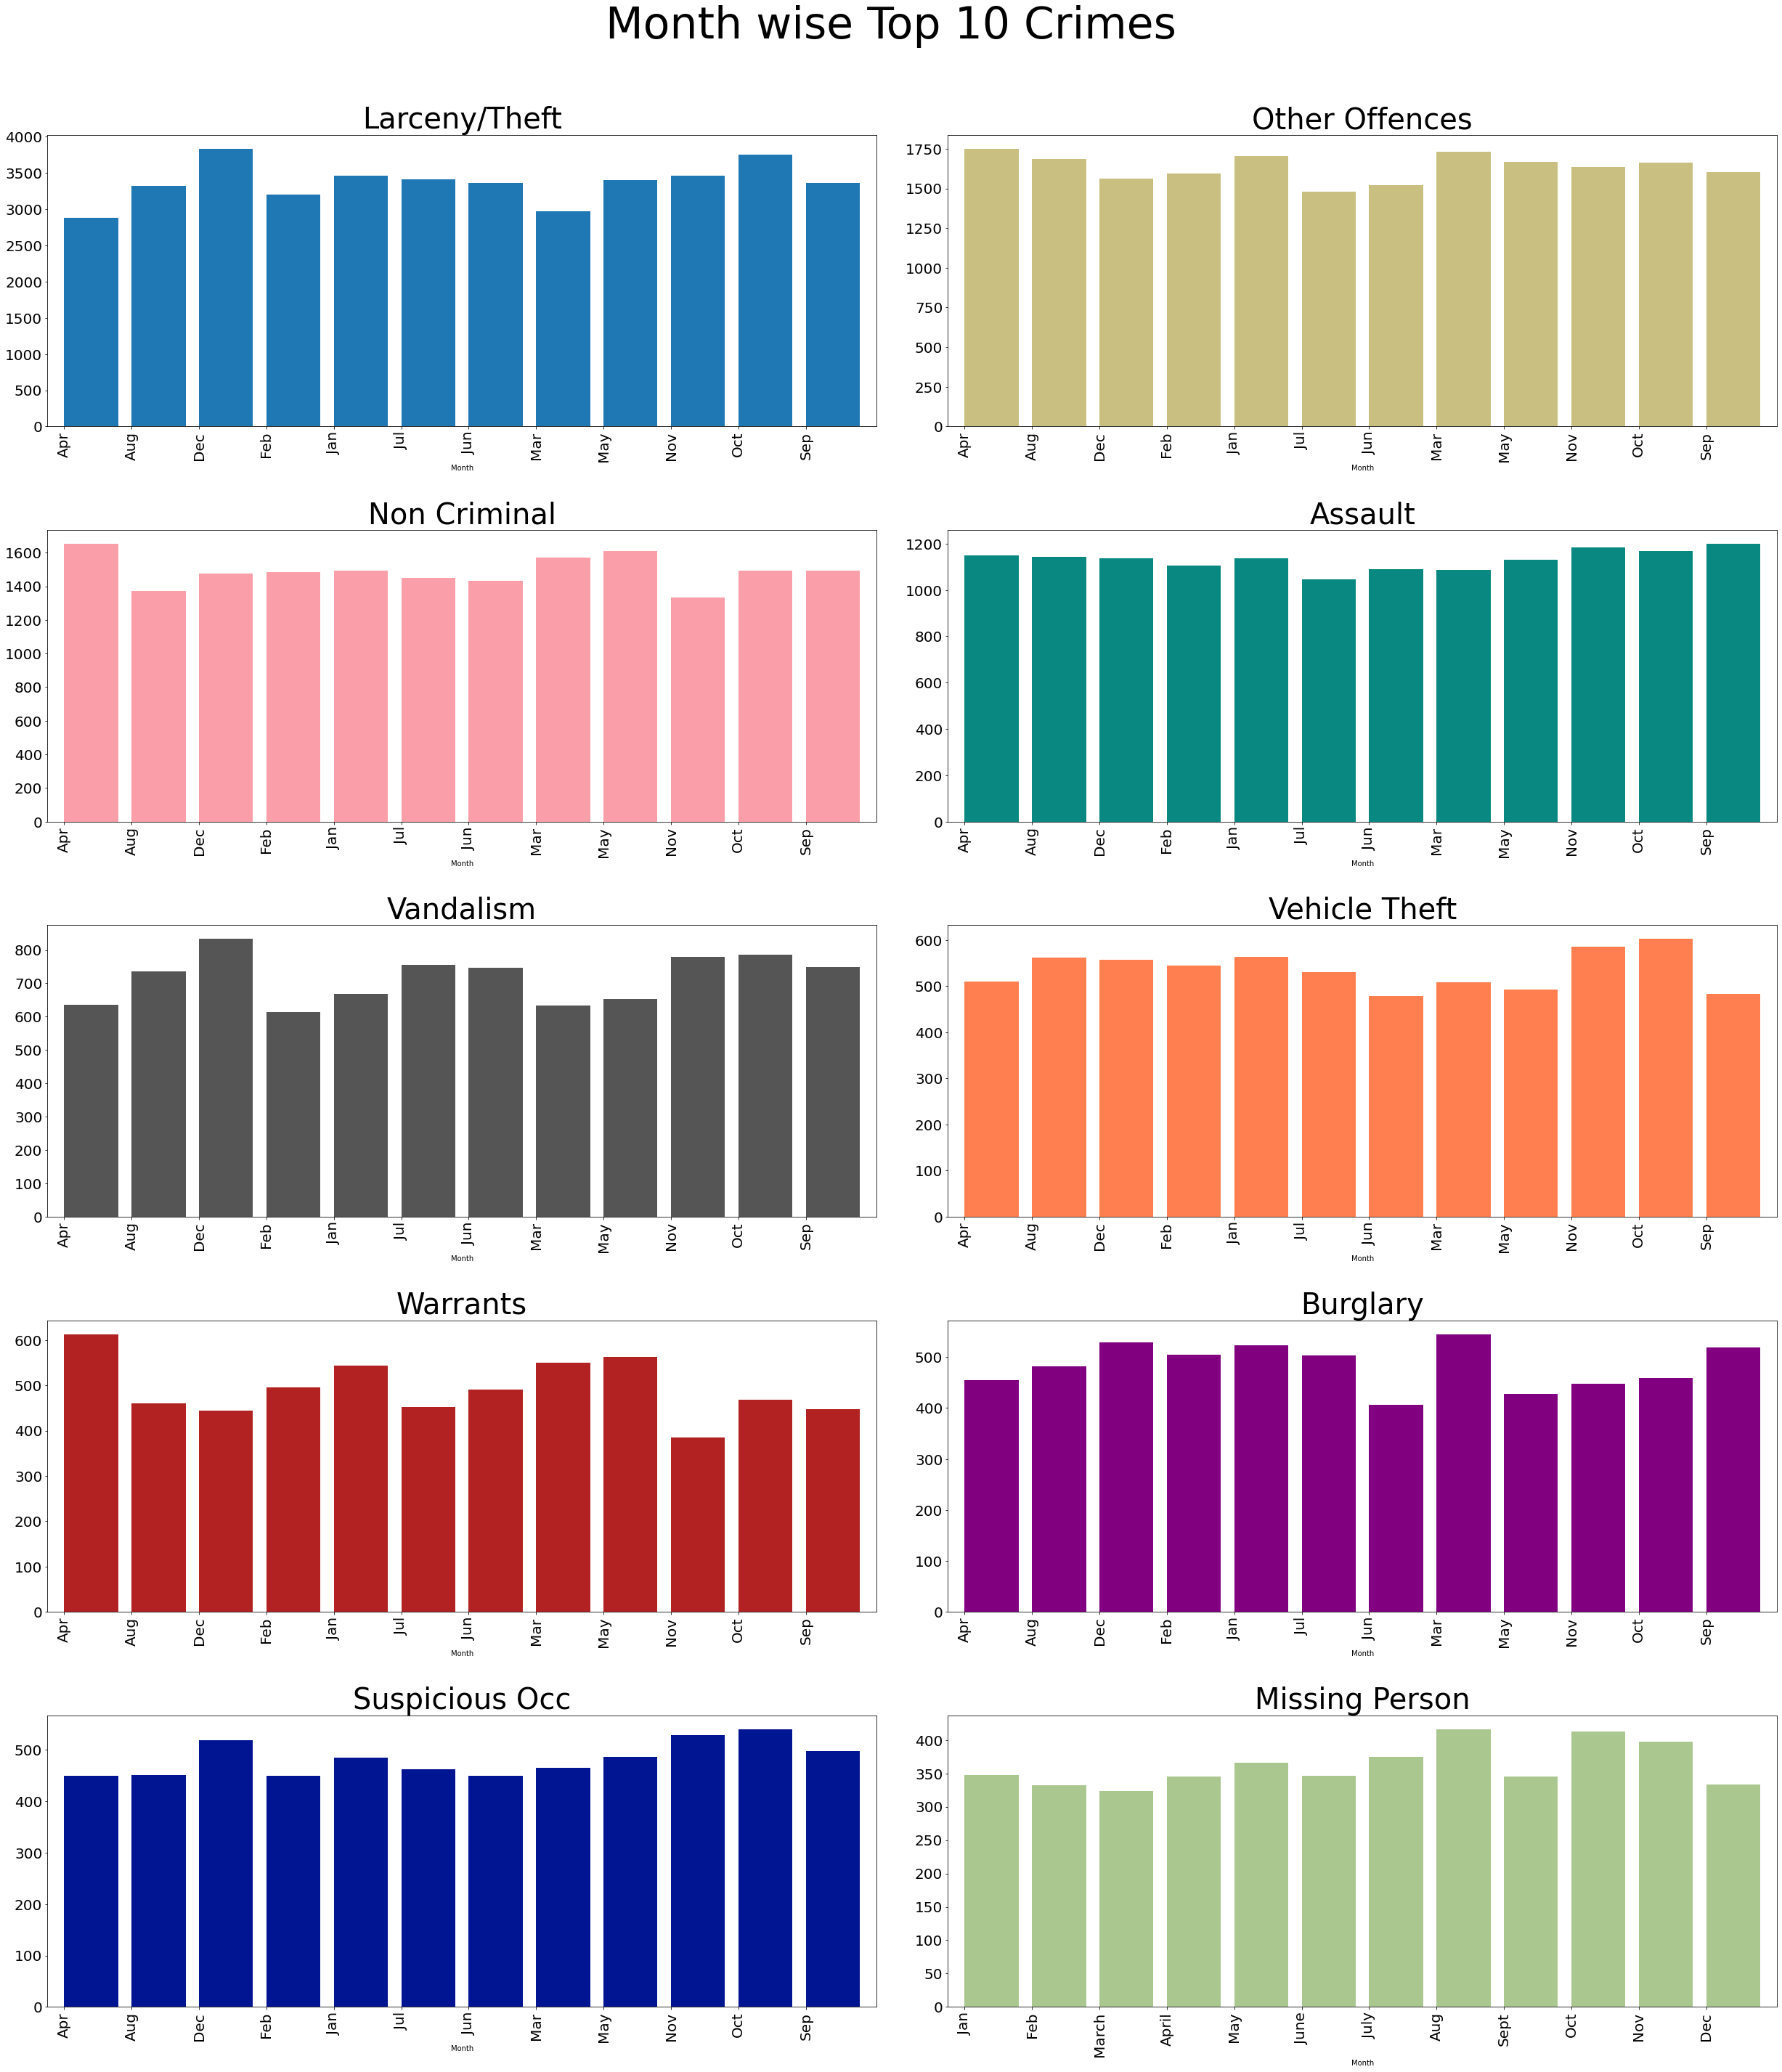

In [31]:
months = ('Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec')
y_pos = np.arange(len(months))
row,column=5,2
fig, axarr = plt.subplots(row, column, figsize=(35, 40))
# Adding title to the subplot
plt.suptitle("Month wise Top 10 Crimes",y=1, fontsize = 60)
# Plotting barcharts for each crime(monthly)
larceny.groupby("Month").size().plot.bar(ax=axarr[0][0],align='edge', width=0.8, fontsize =20)
Other_Offences.groupby("Month").size().plot.bar(ax=axarr[0][1],color='#c8bf80',align='edge', width=0.8, fontsize =20)
Non_Criminal.groupby("Month").size().plot.bar(ax=axarr[1][0],color='#fa9fa9',align='edge', width=0.8, fontsize =20)
Assault.groupby("Month").size().plot.bar(ax=axarr[1][1],color='#088880',align='edge', width=0.8, fontsize =20)
Vandalism.groupby("Month").size().plot.bar(ax=axarr[2][0],color='#555',align='edge', width=0.8, fontsize =20)
Vehicle_theft.groupby("Month").size().plot.bar(ax=axarr[2][1],color='#FF7F50',align='edge', width=0.8, fontsize =20)
Warrants.groupby("Month").size().plot.bar(ax=axarr[3][0],color="#B22222",align='edge', width=0.8, fontsize =20)
Burglary.groupby("Month").size().plot.bar(ax=axarr[3][1],color='#800080',align='edge', width=0.8, fontsize =20)
Suspicious_Occ.groupby("Month").size().plot.bar(ax=axarr[4][0],color='#011492',align='edge', width=0.8, fontsize =20)
Missing_Person.groupby("Month").size().plot.bar(ax=axarr[4][1],color='#ABC790',align='edge', width=0.8, fontsize =20)
# Adding title to the plots
axarr[0, 0].set_title("Larceny/Theft", size=40)
axarr[0, 1].set_title("Other Offences", size=40)
axarr[1, 0].set_title("Non Criminal", size=40)
axarr[1, 1].set_title("Assault", size=40)
axarr[2, 0].set_title("Vandalism", size=40)
axarr[2, 1].set_title("Vehicle Theft", size=40)
axarr[3, 0].set_title("Warrants", size=40)
axarr[3, 1].set_title("Burglary", size=40)
axarr[4, 0].set_title("Suspicious Occ", size=40)
axarr[4, 1].set_title("Missing Person", size=40)
plt.xticks(y_pos,months)
plt.tight_layout(pad=4)
plt.show()

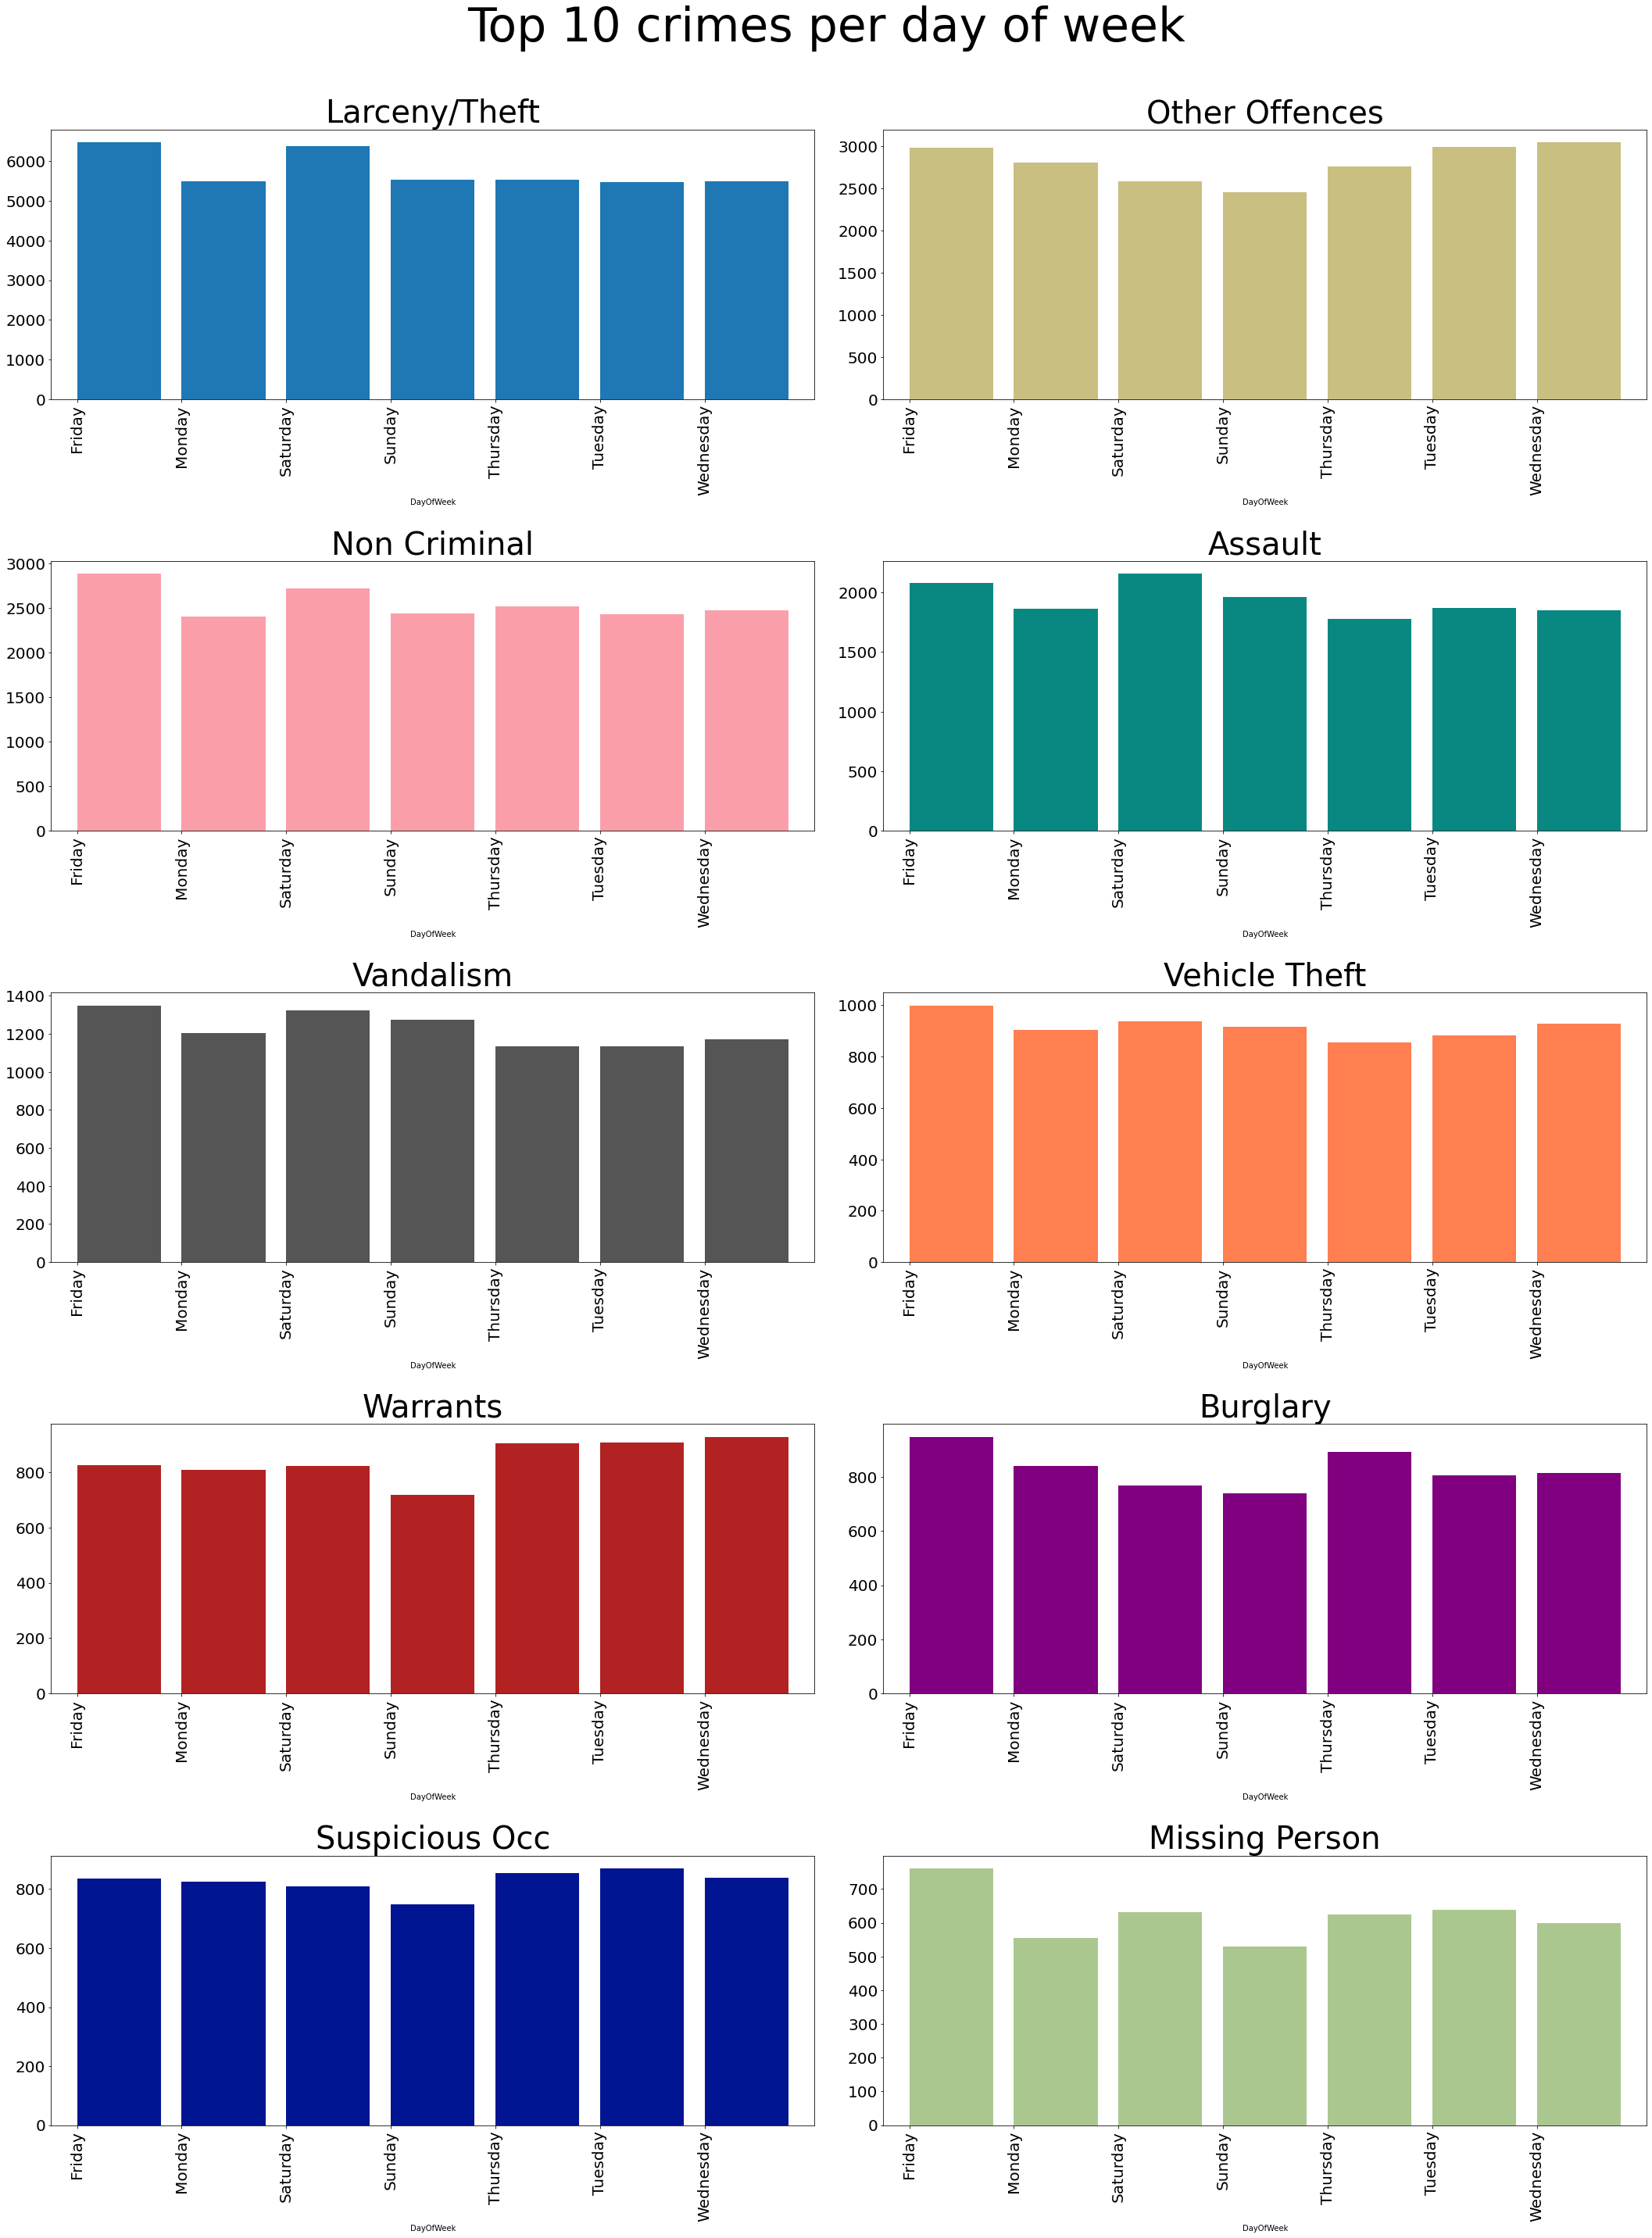

In [32]:
fig, axarr = plt.subplots(5, 2, figsize=(30, 40))
# Adding title to the subplot
plt.suptitle('Top 10 crimes per day of week',y=1, fontsize = 60)
# Plotting barcharts for each crime(weekdays)
larceny.groupby("DayOfWeek").size().plot.bar(ax=axarr[0][0],align='edge', width=0.8, fontsize =20)
Other_Offences.groupby("DayOfWeek").size().plot.bar(ax=axarr[0][1], color='#c8bf80',align='edge', width=0.8, fontsize =20)
Non_Criminal.groupby("DayOfWeek").size().plot.bar(ax=axarr[1][0],color='#fa9fa9',align='edge', width=0.8, fontsize =20)
Assault.groupby("DayOfWeek").size().plot.bar(ax=axarr[1][1],color='#088880', align='edge', width=0.8, fontsize =20)
Vandalism.groupby("DayOfWeek").size().plot.bar(ax=axarr[2][0],color='#555',align='edge', width=0.8, fontsize =20)
Vehicle_theft.groupby("DayOfWeek").size().plot.bar(ax=axarr[2][1],color='#FF7F50',align='edge', width=0.8, fontsize =20)
Warrants.groupby("DayOfWeek").size().plot.bar(ax=axarr[3][0],color="#B22222",align='edge', width=0.8, fontsize =20)
Burglary.groupby("DayOfWeek").size().plot.bar(ax=axarr[3][1],color='#800080',align='edge', width=0.8, fontsize =20)
Suspicious_Occ.groupby("DayOfWeek").size().plot.bar(ax=axarr[4][0],color='#011492',align='edge', width=0.8, fontsize =20)
Missing_Person.groupby("DayOfWeek").size().plot.bar(ax=axarr[4][1],color='#ABC790',align='edge', width=0.8, fontsize =20)
# Adding title to the plots
axarr[0, 0].set_title("Larceny/Theft", size=40)
axarr[0, 1].set_title("Other Offences", size=40)
axarr[1, 0].set_title("Non Criminal", size=40)
axarr[1, 1].set_title("Assault", size=40)
axarr[2, 0].set_title("Vandalism", size=40)
axarr[2, 1].set_title("Vehicle Theft", size=40)
axarr[3, 0].set_title("Warrants", size=40)
axarr[3, 1].set_title("Burglary", size=40)
axarr[4, 0].set_title("Suspicious Occ", size=40)
axarr[4, 1].set_title("Missing Person", size=40)
plt.tight_layout(pad=3)

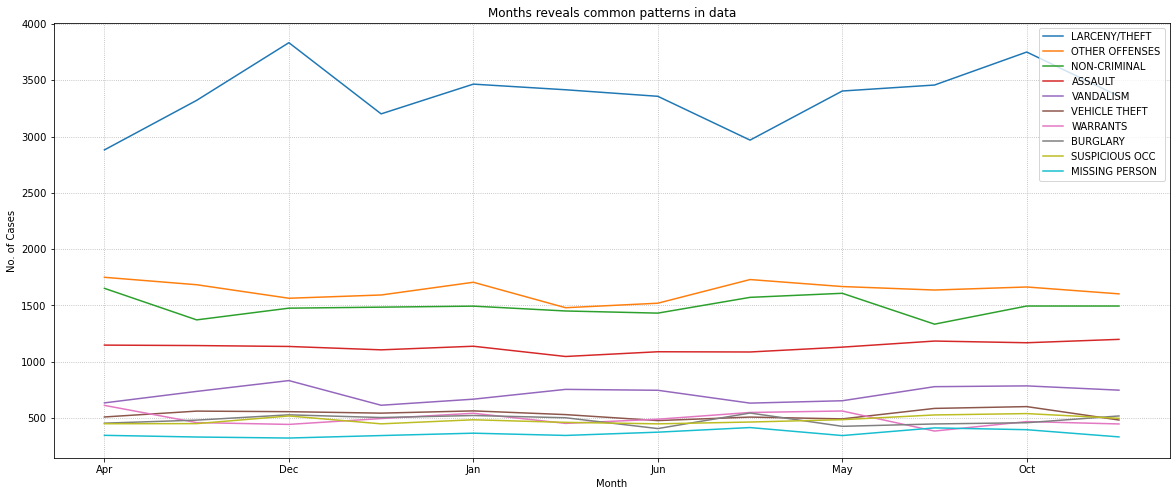

In [33]:
Top10Categories = ["LARCENY/THEFT","OTHER OFFENSES","NON-CRIMINAL","ASSAULT","VANDALISM","VEHICLE THEFT","WARRANTS","BURGLARY","SUSPICIOUS OCC","MISSING PERSON"]
plt.figure(figsize=(20,8))

for category in Top10Categories:
    temp = data[data.Category.str.contains(category)]
    temp.groupby(data["Month"]).size().plot.line()
plt.legend(Top10Categories)
plt.title('Months reveals common patterns in data')
plt.ylabel('No. of Cases')
plt.grid(linestyle='dotted')

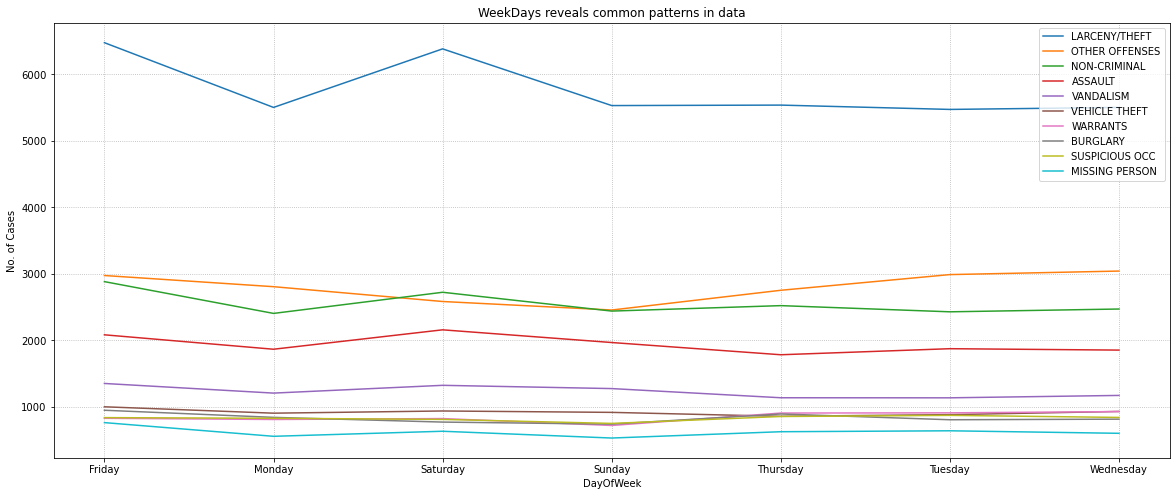

In [34]:
Top10Categories = ["LARCENY/THEFT","OTHER OFFENSES","NON-CRIMINAL","ASSAULT","VANDALISM","VEHICLE THEFT","WARRANTS","BURGLARY","SUSPICIOUS OCC","MISSING PERSON"]
plt.figure(figsize=(20,8))

for category in Top10Categories:
    temp = data[data.Category.str.contains(category)]
    temp.groupby(data["DayOfWeek"]).size().plot.line()
plt.legend(Top10Categories)
plt.title('WeekDays reveals common patterns in data')
plt.ylabel('No. of Cases')
plt.grid(linestyle='dotted')

In [35]:
 # count the number of occurrences for each category
from collections import Counter

def printCategoriesOccurrence():
    
    categories = data['Category']
   
    occurrences = Counter(categories)
    sorted_occ = sorted(occurrences.items(), key=lambda pair: pair[1], reverse=True)
    for key, value in sorted_occ:
        print (key, value)
    return sorted_occ
        
sorted_occ = printCategoriesOccurrence()

LARCENY/THEFT 40409
OTHER OFFENSES 19599
NON-CRIMINAL 17866
ASSAULT 13577
VANDALISM 8589
VEHICLE THEFT 6419
WARRANTS 5914
BURGLARY 5802
SUSPICIOUS OCC 5782
MISSING PERSON 4338
DRUG/NARCOTIC 4243
ROBBERY 3299
FRAUD 2635
SECONDARY CODES 1841
TRESPASS 1812
WEAPON LAWS 1658
SEX OFFENSES, FORCIBLE 940
STOLEN PROPERTY 882
RECOVERED VEHICLE 736
DISORDERLY CONDUCT 658
PROSTITUTION 641
FORGERY/COUNTERFEITING 619
DRUNKENNESS 465
DRIVING UNDER THE INFLUENCE 378
ARSON 286
KIDNAPPING 257
EMBEZZLEMENT 168
LIQUOR LAWS 156
RUNAWAY 140
SUICIDE 69
BRIBERY 66
EXTORTION 60
FAMILY OFFENSES 53
LOITERING 42
SEX OFFENSES, NON FORCIBLE 40
BAD CHECKS 34
GAMBLING 20
PORNOGRAPHY/OBSCENE MAT 4
TREA 3


In [36]:
import math
# if category size < 1000, duplicate it to be = 1000
for key,value in sorted_occ:
    if value<1000:
        
        temp = data[data['Category'] == key]
        data = data.append([temp]*int(math.ceil((1000-value)/float(value))), ignore_index=True)

sorted_occ = printCategoriesOccurrence()

LARCENY/THEFT 40409
OTHER OFFENSES 19599
NON-CRIMINAL 17866
ASSAULT 13577
VANDALISM 8589
VEHICLE THEFT 6419
WARRANTS 5914
BURGLARY 5802
SUSPICIOUS OCC 5782
MISSING PERSON 4338
DRUG/NARCOTIC 4243
ROBBERY 3299
FRAUD 2635
SEX OFFENSES, FORCIBLE 1880
SECONDARY CODES 1841
TRESPASS 1812
STOLEN PROPERTY 1764
WEAPON LAWS 1658
RECOVERED VEHICLE 1472
DRUNKENNESS 1395
DISORDERLY CONDUCT 1316
PROSTITUTION 1282
FORGERY/COUNTERFEITING 1238
ARSON 1144
DRIVING UNDER THE INFLUENCE 1134
RUNAWAY 1120
LIQUOR LAWS 1092
BRIBERY 1056
SUICIDE 1035
KIDNAPPING 1028
EXTORTION 1020
BAD CHECKS 1020
EMBEZZLEMENT 1008
LOITERING 1008
FAMILY OFFENSES 1007
TREA 1002
SEX OFFENSES, NON FORCIBLE 1000
GAMBLING 1000
PORNOGRAPHY/OBSCENE MAT 1000


## Feature Scaling

In [37]:
scaler = StandardScaler()
model = scaler.fit(data[['X','Y']])
data[['X','Y']] = model.transform(data[['X','Y']])

In [38]:
# spliting train data into target and other features
target = data['Category']
features =  data[['DayOfWeek','PdDistrict','X','Y']]

In [39]:
features1 = ['Date', 'DayOfWeek', 'PdDistrict', 'Address']
for feature in features1:
    print ("feature: {}    unique_size: {}".format(feature ,len(data[feature].unique())))

feature: Date    unique_size: 366
feature: DayOfWeek    unique_size: 7
feature: PdDistrict    unique_size: 10
feature: Address    unique_size: 16130


## Feature Encoding

In [40]:
data_week_dict = {
    "Monday":1,
    "Tuesday":2,
    "Wednesday":3,
    "Thursday":4,
    "Friday":5,
    "Saturday":6,
    "Sunday":7
 }

In [41]:
features['DayOfWeek'] = features['DayOfWeek'].replace(data_week_dict)

In [42]:
features = features.join(pd.get_dummies(features['PdDistrict']))
features.head()

,DayOfWeek,PdDistrict,X,Y,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,5,SOUTHERN,0.764947,0.300920,0,0,0,0,0,0,0,1,0,0
1,5,SOUTHERN,0.764947,0.300920,0,0,0,0,0,0,0,1,0,0
2,1,BAYVIEW,1.310261,-1.590564,1,0,0,0,0,0,0,0,0,0
3,2,TENDERLOIN,0.406401,0.732487,0,0,0,0,0,0,0,0,0,1
4,5,MISSION,0.155223,-0.130768,0,0,0,1,0,0,0,0,0,0


In [43]:
features.head()

,DayOfWeek,PdDistrict,X,Y,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,5,SOUTHERN,0.764947,0.300920,0,0,0,0,0,0,0,1,0,0
1,5,SOUTHERN,0.764947,0.300920,0,0,0,0,0,0,0,1,0,0
2,1,BAYVIEW,1.310261,-1.590564,1,0,0,0,0,0,0,0,0,0
3,2,TENDERLOIN,0.406401,0.732487,0,0,0,0,0,0,0,0,0,1
4,5,MISSION,0.155223,-0.130768,0,0,0,1,0,0,0,0,0,0


In [44]:
features.drop(columns=['PdDistrict'], inplace=True)
print ("data size =",len(data))
features.head()

data size = 170804


,DayOfWeek,X,Y,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,5,0.764947,0.300920,0,0,0,0,0,0,0,1,0,0
1,5,0.764947,0.300920,0,0,0,0,0,0,0,1,0,0
2,1,1.310261,-1.590564,1,0,0,0,0,0,0,0,0,0
3,2,0.406401,0.732487,0,0,0,0,0,0,0,0,0,1
4,5,0.155223,-0.130768,0,0,0,1,0,0,0,0,0,0


In [45]:
label_encoder = LabelEncoder()
target= label_encoder.fit_transform(target)

In [46]:
features.columns

Index(['DayOfWeek', 'X', 'Y', 'BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION',
       'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN'],
      dtype='object')

# Model Building

### Spliting data into train and test

In [47]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.3,random_state=102)

## Logistic Regression

In [48]:
lr=LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [49]:
lr.fit(features_train,target_train)

LogisticRegression(multi_class='multinomial')

In [50]:
pred = lr.predict_proba(features_test)

In [51]:
logreg_loss=log_loss(target_test,pred)
print(logreg_loss)

2.8158126140382627


## K Nearest Neighbors

In [52]:
knn = KNeighborsClassifier()

In [53]:
knn.fit(features_train, target_train)

KNeighborsClassifier()

In [54]:
pred_knn = knn.predict_proba(features_test)

In [55]:
knn_loss = log_loss(target_test,pred_knn)
print(knn_loss)

15.458816513788548


## Random Forest

In [56]:
random_forest = RandomForestClassifier(n_estimators=500, max_depth=15, max_features='sqrt',
                                       min_samples_leaf=5, min_samples_split=25, 
                                       random_state=1, verbose=1, n_jobs=2)


random_forest.fit(features_train, target_train)
pred_rf = random_forest.predict_proba(features_test)

rf_loss = log_loss(target_test,pred_rf)
print(rf_loss)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   26.8s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.0min
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:  1.1min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    4.5s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:   10.5s


2.3187252700944208


[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:   11.8s finished


## XGBoost

In [57]:
xgbm = XGBClassifier(random_state=1,learning_rate=0.01)
xgbm.fit(features_train, target_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=1, reg_alpha=0, ...)

In [58]:
pred_xgbm = xgbm.predict_proba(features_test)
xgb_loss = log_loss(target_test,pred_xgbm)
print(xgb_loss)

2.8967318054205604


# Model Comparision

In [59]:
models = pd.DataFrame({
    'Model': ['Logistic Regression (Multinomial)', 'Random Forest', 'XGBoost', 'K Neighbors'],
    'Log_Loss': [logreg_loss, rf_loss, xgb_loss, knn_loss]})
print(models.sort_values(by='Log_Loss', ascending=True).reset_index(drop=True))

                               Model   Log_Loss
0                      Random Forest   2.318725
1  Logistic Regression (Multinomial)   2.815813
2                            XGBoost   2.896732
3                        K Neighbors  15.458817


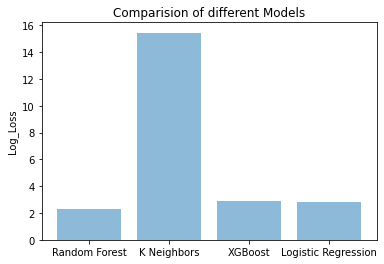

In [60]:
objects = ('Random Forest', 'K Neighbors', 'XGBoost', 'Logistic Regression')
y_pos = np.arange(len(objects))
performance = [rf_loss, knn_loss, xgb_loss, logreg_loss]
plt.bar(y_pos,performance, align='center',alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Log_Loss')
plt.title('Comparision of different Models');

## Conclusion

As we can see the log loss of Random Forest is less as compared to other algorithms so Random Forest is the best fitted algorithm in the given dataset.<br>